# Composite Histogram Testing

In [454]:
import sys
import seaborn.apionly as sns
from imp import reload
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
import ebtel_plot_em as ebpe
reload(ebpe)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:1175: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_plot_em' from '/home/wtb2/Documents/EBTEL_analysis/src/ebtel_plot_em.py'>

Here, we'll test the building of histograms of slope values for a whole set of heating functions or all of our sets of $T_N$ values. We will only discriminate between species and loop length $L$.

First, set some alpha values as a list of two-parameter lists of $\alpha$ and $b$ values.

In [455]:
alpha_list = [['uniform',''],['1.5',''],['1.5','-b1.0'],['1.5','-b2.0'],
              ['2.0',''],['2.0','-b1.0'],['2.0','-b2.0'],
             ['2.5',''],['2.5','-b1.0'],['2.5','-b2.0']]

Instantiate the histogram builder class.

In [456]:
histo_builder = ebpe.EMHistoBuilder('electron',40.0,100.0,alpha_list,group='by_alpha',
                                    figsize=(8,5),alfs=0.65,format='pdf',dpi=1000,fs=22)

Now, load and format the data.

In [457]:
histo_builder.loader(0)

Now, build the dictionary of histogram options.

In [458]:
xkcd_cols = ['black','windows blue','medium green','fire engine red']
cp = sns.xkcd_palette(xkcd_cols)
colors = []
colors.append(cp[0])
[colors.append(cp[1]) for _ in range(3)]
[colors.append(cp[2]) for _ in range(3)]
[colors.append(cp[3]) for _ in range(3)]
styles = ['dotted'] + 3*['solid','dashdot','dashed'] 
labels = [r'$\mathrm{uniform}$',r'$-1.5$',r'$-1.5$, $b=1$',r'$-1.5$, $b=2$',
         r'$-2.0$',r'$-2.0$, $b=1$',r'$-2.0$, $b=2$',
         r'$-2.5$',r'$-2.5$, $b=1$',r'$-2.5$, $b=2$',]
histo_opts = {}
for i in range(len(alpha_list)):
    histo_opts[''.join(alpha_list[i])] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

Finally, build the histograms using our options specified above.

In [459]:
histo_builder.histo_maker('cool',histo_opts,x_limits=[1.9,5.1],leg_loc=1,
                         print_fig_filename='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/el_cool_alpha_histo')

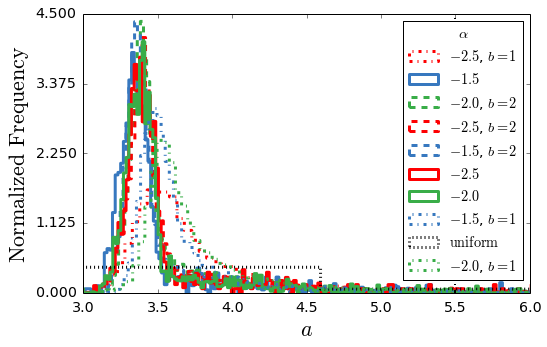

In [460]:
histo_builder.histo_maker('hot',histo_opts,x_limits=[3,6],leg_loc=1)

In [461]:
histo_builder_ion_alpha = ebpe.EMHistoBuilder('ion',40.0,100.0,alpha_list,group='by_alpha',
                                    figsize=(8,5),alfs=0.65,format='pdf',dpi=1000,
                                             fs=22)
histo_builder_ion_alpha.loader(0)
histo_builder_ion_alpha.histo_maker('cool',histo_opts,x_limits=[1.9,5.1],leg_loc=1,leg_off=True,
                                   print_fig_filename='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/ion_cool_alpha_histo')

What if we bin by $T_N$ instead?

In [462]:
histo_builder_2 = ebpe.EMHistoBuilder('electron',40.0,100.0,alpha_list,group='by_t_wait',
                                     figsize=(8,5),alfs=0.65,format='pdf',dpi=1000,
                                     fs=22)

In [463]:
histo_builder_2.loader(3)

Set labels and plot options based on index of the $T_N$ value.

In [464]:
#update color palette with extra color
xkcd_cols = xkcd_cols + ['barney purple']
cp = sns.xkcd_palette(xkcd_cols)
#set colors
colors = []
for c in cp:
    [colors.append(c) for _ in range(4)]
#set styles and labels
styles = 5*['dotted','dashdot','dashed','solid'] 
labels = [r'$%d$ s'%tn for tn in np.arange(250,5250,250)]
histo_opts = {}
for i in np.arange(0+3,20+3,1+3):
    histo_opts[str(i)] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

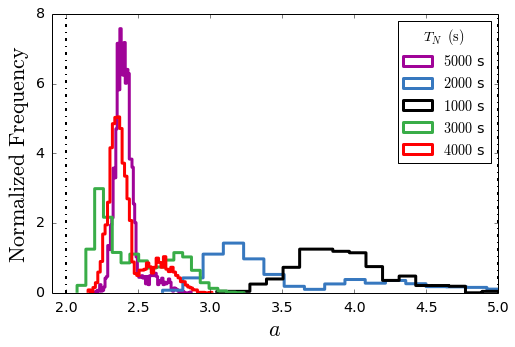

In [465]:
histo_builder_2.histo_maker('cool',histo_opts,leg_loc=1,x_limits=[1.9,5])

In [466]:
histo_builder_2.histo_maker('hot',histo_opts,leg_loc=1,x_limits=[3.0,7],
                           print_fig_filename='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/el_hot_tn_histo')

Do the hot results for the single case.

In [467]:
histo_builder_3 = ebpe.EMHistoBuilder('single',40.0,100.0,alpha_list,group='by_t_wait',
                                      root_dir='/data/datadrive2/EBTEL_C_figs/',figsize=(8,5),
                                     alfs=0.65,format='pdf',dpi=1000,
                                     fs=22)

In [468]:
histo_builder_3.loader(3)

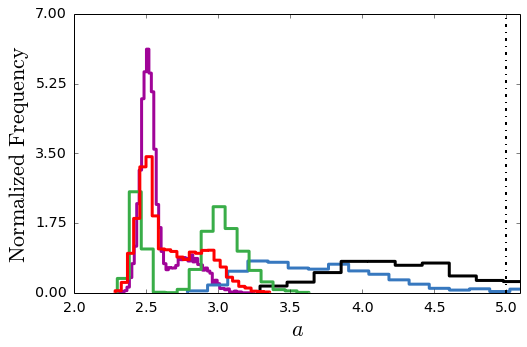

In [469]:
histo_builder_3.histo_maker('cool',histo_opts,leg_loc=1,x_limits=[2,5.1],leg_off=True)

In [470]:
histo_builder_3.histo_maker('hot',histo_opts,leg_loc=1,x_limits=[3.0,7],leg_off=True,
                           print_fig_filename='/home/wtb2/Documents/papers/hot_non-flaring_plasma_2/figures/single_hot_tn_histo')